In [2]:
%matplotlib inline
import sys
sys.path.append('../')
from src.LRGSG_package.LRGSG import *

In [3]:
# stochastic block model parameters
N1 = N2 = 10
sizes = [N1, N2]
probs = [[0.95, 0.07], [0.07, 0.95]]

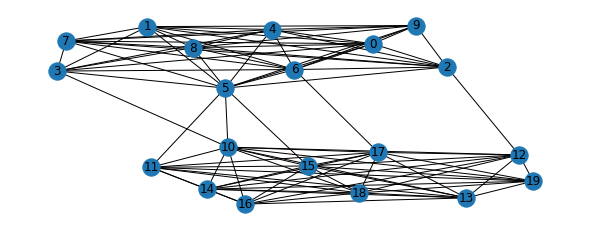

In [4]:
G = nx.stochastic_block_model(sizes, probs, seed=0)
labelList = [i for i in range(G.number_of_nodes())]
plt.figure(figsize=(8,3)) 
nx.draw(G, node_size=300, with_labels = True)

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
100%|██████████| 1000/1000 [00:00<00:00, 24875.77it/s]


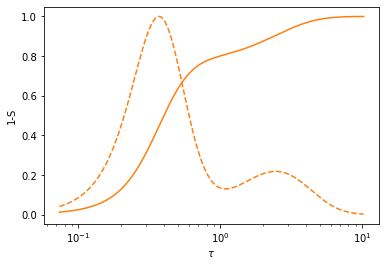

In [5]:
[S1,dS1,VarL1,t1] = entropy(G)

t11 = (t1[1:]+t1[:-1])/2.0
plt.plot(t1, S1, label='ER-05',color='C1')
plt.plot(t11, dS1/np.max(dS1), ls='--',color='C1')

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')

plt.xscale('log')

In [6]:
# utils
tresh = 0.1
dentroOpts = {'leaf_rotation': 0, 
              'orientation': 'right', 
              'color_threshold': tresh,
              'above_threshold_color': 'k',
              'leaf_font_size': 10,
              'labels': labelList}

In [7]:
# laplacian, spectrum and densities
linkage_matrix, w = MakeLinkageMatrix(G, tau=1e-2, is_signed=False, method="ward")
#
tmin = linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
tmax = linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]

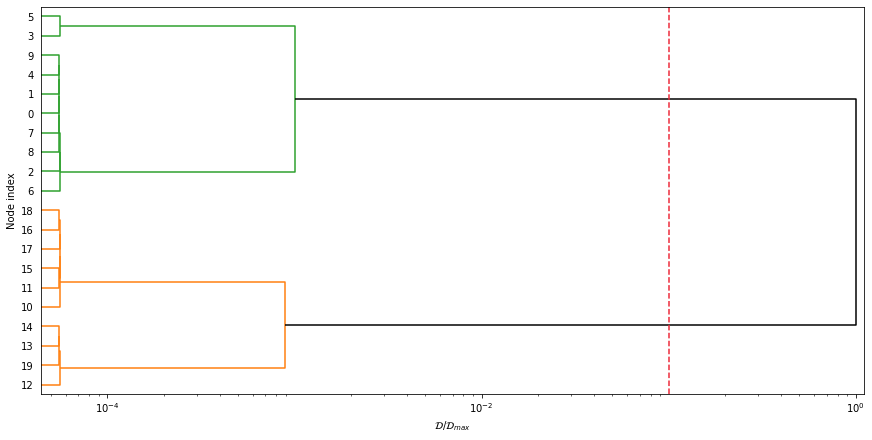

In [8]:
ax_dict = plt.figure(constrained_layout=True,
                     figsize=(12, 6)).subplot_mosaic("A")

ax_dict['A'].set_xlabel(r'$\mathcal{D}/\mathcal{D}_{max}$')
ax_dict['A'].set_ylabel('Node index')

dendrogram(linkage_matrix, ax=ax_dict['A'], **dentroOpts)
CM = fcluster(linkage_matrix, t=tresh, criterion='distance')
cmap = build_colormap(MiscPalette.TONKA, True)
cmap1 = cmap(np.linspace(0, 1, np.max(CM)))
cmap1[0] = [0., 175/255., 187/255., 1.]
cmap1[1] = [252/255., 78/255., 7/255., 1.]

hierarchy.set_link_color_palette([mplc.rgb2hex(rgb[:3]) for rgb in cmap1])

ax_dict['A'].axvline(x=tresh, c='#ED2939', ls='--')
ax_dict['A'].set_xlim(tmin, tmax)
ax_dict['A'].set_xscale('log')
ax_dict['A'].set_xticks([1e-4, 1e-2, 1e0])
plt.show()

In [9]:
# stochastic block model with subpartition
G = nx.stochastic_block_model(sizes, probs, seed=1)

for edge in G.edges():
    G.add_edge(edge[0], edge[1], weight=1)

# plt.figure(figsize=(8,3)) 
# nx.draw(G, node_size=300, with_labels = True)

H = nx.quotient_graph(G, G.graph["partition"], relabel=False)

community1 = list(list(H.nodes())[0])
sub_community1 = community1[:len(community1)//2]
sub_community2 = community1[len(community1)//2:]
for vertex in sub_community1:
    for edge in G.edges(vertex):
        if edge[1] in sub_community2 and np.random.rand(1) < 1:
            G[edge[0]][edge[1]]['weight'] =-1

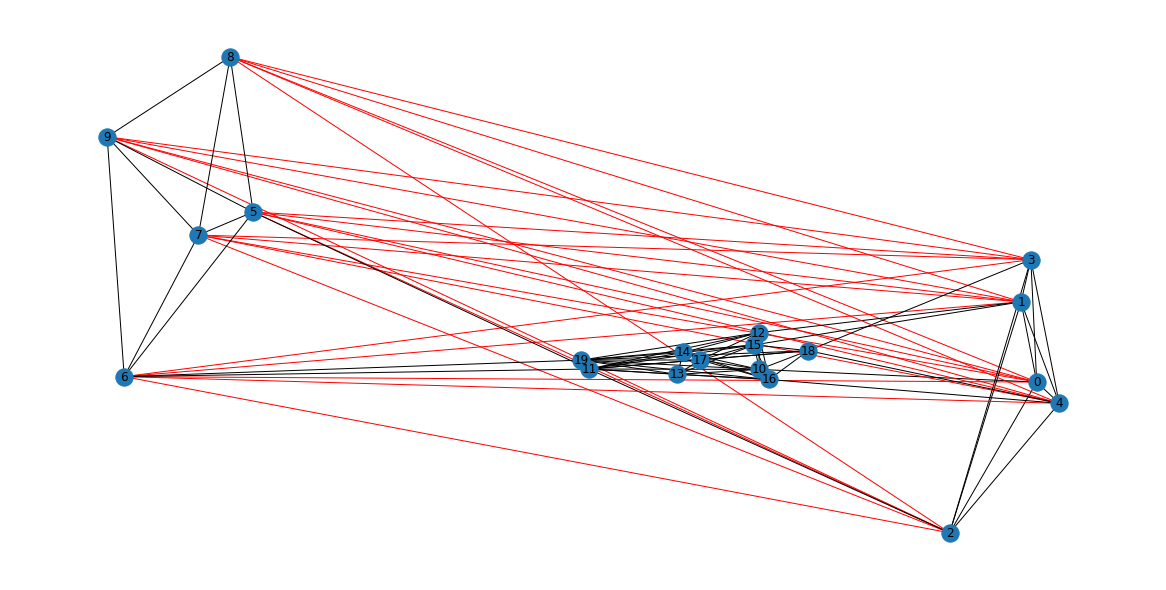

In [10]:
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u,v in G.edges()]
plt.figure(figsize=(16,8)) 
nx.draw(G, edge_color=colors, node_size=300, with_labels = True)

/home/opisthofulax/PhD/projects/complex-networks/LRG-Signed/notebooks/../src/LRGSG_package/LRGSG.py:18: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()
100%|██████████| 1000/1000 [00:00<00:00, 25807.61it/s]


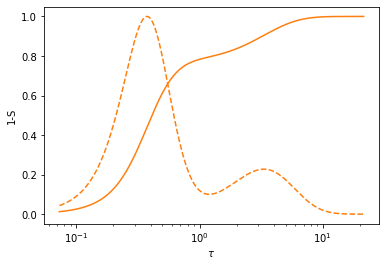

In [11]:
[S1,dS1,VarL1,t1]=entropy(G, is_signed=True)

plt.plot(t1,S1,label='ER-05',color='C1')
t11 = (t1[1:]+t1[:-1])/2.0
plt.plot(t11,dS1/np.max(dS1),ls='--',color='C1')

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')

plt.xscale('log')

In [15]:
# laplacian, spectrum and densities
linkage_matrix, w = MakeLinkageMatrix(G, tau=1e0, is_signed=True, method="average")
#
tmin = linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
tmax = linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]

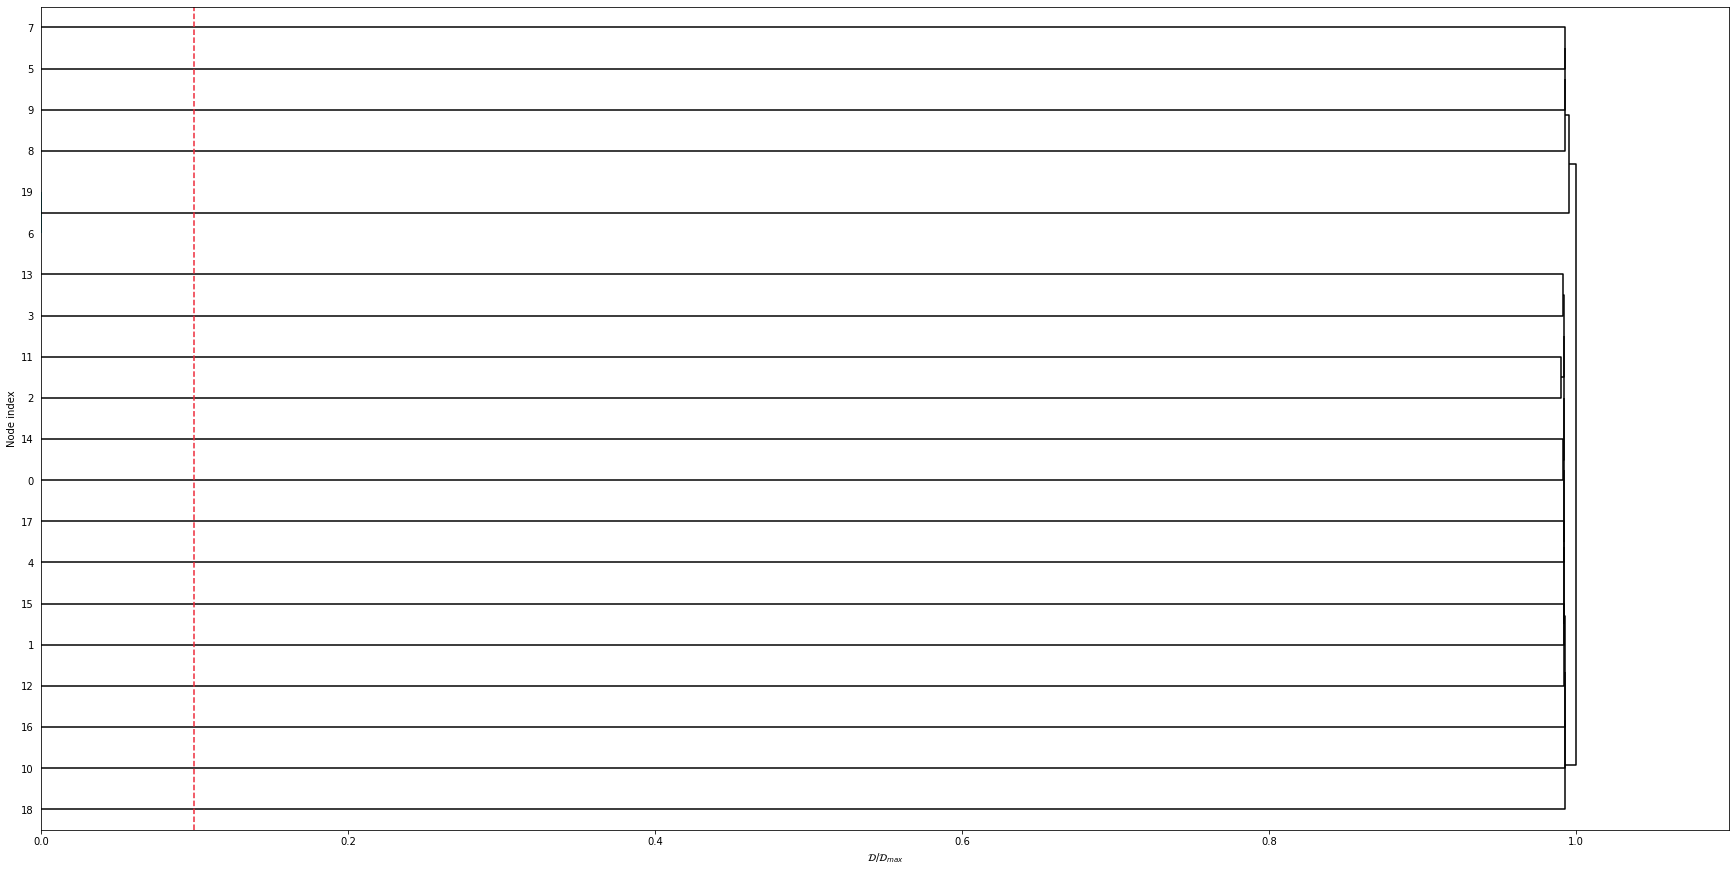

In [16]:
ax_dict = plt.figure(constrained_layout=True,
                     figsize=(24, 12)).subplot_mosaic("A")

dendrogram(linkage_matrix,labels=labelList,ax=ax_dict['A'],leaf_rotation=0,orientation='right',color_threshold=tresh,above_threshold_color='k',leaf_font_size=10)
CM = fcluster(linkage_matrix, t=tresh, criterion='distance')

cmap = build_colormap(MiscPalette.TONKA, True)
cmap1 = cmap(np.linspace(0, 1, np.max(CM)))
cmap1[0]=[0., 175/255., 187/255., 1.]
cmap1[1]=[252/255., 78/255., 7/255., 1.]
hierarchy.set_link_color_palette([mplc.rgb2hex(rgb[:3]) for rgb in cmap1])
ax_dict['A'].axvline(x = tresh, color = '#ED2939', linestyle = '--')
ax_dict['A'].set_xlim(tmin,tmax)

ax_dict['A'].set_xlabel(r'$\mathcal{D}/\mathcal{D}_{max}$')
ax_dict['A'].set_ylabel('Node index')
# ax_dict['A'].set_xscale('log')
# ax_dict['A'].set_xticks([1e0])


plt.show()

In [14]:
node = 70
for n in [n for n in G.neighbors(node)]:
    node, n, G.get_edge_data(node, n)['weight']

NetworkXError: The node 70 is not in the graph.

In [ ]:
# stochastic block model with subpartition
G = nx.stochastic_block_model(sizes, probs, seed=1)

for edge in G.edges():
    G.add_edge(edge[0], edge[1], weight=1)
    sign = G.get_edge_data(edge[0], edge[1])

# plt.figure(figsize=(8,3)) 
# nx.draw(G, node_size=300, with_labels = True)

H = nx.quotient_graph(G, G.graph["partition"], relabel=False)

community1 = list(list(H.nodes())[0])
community2 = list(list(H.nodes())[1])
for vertex in community1:
    for edge in G.edges(vertex):
        if edge[1] in community2 and np.random.rand(1) < .5:
            G[edge[0]][edge[1]]['weight'] =-1

In [ ]:
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u,v in G.edges()]
plt.figure(figsize=(16,8)) 
nx.draw(G, edge_color=colors, node_size=300, with_labels = True)

In [ ]:
[S1,dS1,VarL1,t1]=entropy(G, is_signed=True)

plt.plot(t1,S1,label='ER-05',color='C1')
t11 = (t1[1:]+t1[:-1])/2.0
plt.plot(t11,dS1/np.max(dS1),ls='--',color='C1')

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')

plt.xscale('log')

In [ ]:
# laplacian, spectrum and densities
linkage_matrix, w = MakeLinkageMatrix(G, tau=5e0, is_signed=True, method="average")
#
tmin = linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
tmax = linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]

In [ ]:
ax_dict = plt.figure(constrained_layout=True,
                     figsize=(24, 12)).subplot_mosaic("A")

dendrogram(linkage_matrix,labels=labelList,ax=ax_dict['A'],leaf_rotation=0,orientation='right',color_threshold=tresh,above_threshold_color='k',leaf_font_size=10)
CM = fcluster(linkage_matrix, t=tresh, criterion='distance')

cmap = build_colormap(MiscPalette.TONKA, True)
cmap1 = cmap(np.linspace(0, 1, np.max(CM)))
cmap1[0]=[0., 175/255., 187/255., 1.]
cmap1[1]=[252/255., 78/255., 7/255., 1.]
hierarchy.set_link_color_palette([mplc.rgb2hex(rgb[:3]) for rgb in cmap1])
# ax_dict['A'].axvline(x = tresh, color = '#ED2939', linestyle = '--')
# tmin=linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
# tmax=linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]
# ax_dict['A'].set_xlim(tmin,tmax)

ax_dict['A'].set_xlabel(r'$\mathcal{D}/\mathcal{D}_{max}$')
ax_dict['A'].set_ylabel('Node index')
# ax_dict['A'].set_xscale('log')
# ax_dict['A'].set_xticks([1efff0])


plt.show()